# Case 1 - Hotel customer segmentation 

Alexandre - 20240568 <br>
Diogo Melo - 20240698 <br>
Gonçalo Varanda - 20240691 <br>
Miguel Ferreira - 20240569



### This Notebook uses the "Case1_HotelCustomerSegmentation.csv" dataset

### Dataset description:

Dataset of a Hotel in Portugal, with information and preferences regarding customer bookings.

#### Hotel client data:
- **ID**: numeric - Customer ID
- **age**: numeric - age of the customer
- **namehash**: hash of the customer's name (categorical)
- **docIDhash**: hash of the customer’s personal document identification number (usually a passport or ID card) (categorical)
- **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **nationality**: nationality of the customer in ISO 3166-1 (Alpha 3) format (categorical)

#### Related with the bookings:
- **AverageLeadTime**: numeric - Average number of days before arrival date the customer makes bookings
- **LodgingRevenue**: numeric - Total amount of lodging revenue paid by the customer so far
- **OtherRevenue**: numeric - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- **PersonNights**: numeric - Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights(Length-of-stay) of the booking
- **RoomNights**: numeric - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- **DistributionChannel**: Distribution channel normally used by the customer to make bookings at the hotel (categorical: 'Corporate','Travel Agent/Operator','Direct','GDS Systems')
- **MarketSegment**: Current market segment of the customer (categorical: 'Corporate','Travel Agent/Operator','Direct','Aviation','Groups','Complementary','Other')
- **BookingsCanceled**: numeric - Number of bookings the customer made but subsequently canceled
- **BookingsNoShowed**: numeric - Number of bookings the customer made but subsequently made a "no-show"
- **BookingsCheckedin**: numeric - Number of bookings the customer made, which actually ended up staying

#### Preferences: (Indication if the customer usually asks for a...)
- **SRHighFloor**: room in a higher floor (0: No, 1: Yes)
- **SRLowFloor**: room in a lower floor (0: No, 1: Yes) 
- **SRAccessibleRoom**: accessible room (0: No, 1: Yes) 
- **SRMediumFloor**: room in a middle floor (0: No, 1: Yes)
- **SRBathtub**: room with a bathtub (0: No, 1: Yes)
- **SRShower**: room with a shower (0: No, 1: Yes)
- **SRCrib**: crib (0: No, 1: Yes) 
- **SRKingSizeBed**: room with a king size bed (0: No, 1: Yes)
- **SRTwinBed**: room with a twin bed (0: No, 1: Yes)
- **SRNearElevator**: room near the elevator (0: No, 1: Yes)
- **SRAwayFromElevator**: room away from the elevator (0: No, 1: Yes) 
- **SRNoAlcoholInMiniBar**: room with no alcohol in the mini bar (0: No, 1: Yes)
- **SRQuietRoom**: room away from the noise (0: No, 1: Yes)


### Possible aditional metadata:

- **is_european**: If the customer is european (0: No, 1: Yes)
- **is_portuguese**: If the customer is portuguese (0: No, 1: Yes)
- **nation_by_continent**: Group countries in Continents to reduce high cardinality / or Zones (Ex: North America, South of Europe...)
- **age_category**: Create age categories based on common sense or statistics.



<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 1 Import the needed libraries
    

</div>

In [3]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# encoders

# Models

# Metrics 

# Others
%pip install pycountry
import pycountry

# for better resolution plots and others


   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------  6.3/6.3 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 24.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 2 Data Understanding
    

</div>

In [4]:
df = pd.read_csv("datasets/Case1_HotelCustomerSegmentation.csv", sep=';', index_col='ID')
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

We might remove the columns `NameHash` and `DocIDHash` 

In [6]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,2.203825,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,2.301637,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# missing values
df.isna().sum().sort_values(ascending=False)

Age                     4172
DocIDHash               1001
Nationality                0
SRHighFloor                0
SRNoAlcoholInMiniBar       0
SRAwayFromElevator         0
SRNearElevator             0
SRTwinBed                  0
SRKingSizeBed              0
SRCrib                     0
SRShower                   0
SRBathtub                  0
SRMediumFloor              0
SRAccessibleRoom           0
SRLowFloor                 0
MarketSegment              0
DistributionChannel        0
RoomNights                 0
PersonsNights              0
BookingsCheckedIn          0
BookingsNoShowed           0
BookingsCanceled           0
OtherRevenue               0
LodgingRevenue             0
AverageLeadTime            0
NameHash                   0
DaysSinceCreation          0
SRQuietRoom                0
dtype: int64

The group observed the presence of negative values in the columns `Age` and `AverageLeadTime`

In [ ]:
# maybe just replace by mean of Nationality and DistributionChannel or MarketSegment
df[df["Age"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,...,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,...,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,...,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,...,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,...,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df[df["AverageLeadTime"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
23064,PRT,NaN,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29374,USA,25.0,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
51375,CHN,33.0,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58655,FRA,57.0,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58662,FRA,62.0,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58676,FRA,61.0,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
60590,ESP,46.0,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
62690,USA,70.0,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
68486,GBR,46.0,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Negative Values to fix / see:**
 - Age (14 cells)
 - AverageLeadTime (13 cells)

Bookings Variables

In [11]:
df['BookingsCanceled'].value_counts()

BookingsCanceled
0     111567
1        125
2         19
3         11
4          8
15         1
7          1
5          1
Name: count, dtype: int64

In [13]:
df['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    111676
1        48
2         8
3         1
Name: count, dtype: int64

In [16]:
df['BookingsCheckedIn'].describe()

count    111733.000000
mean          0.737607
std           0.730889
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          76.000000
Name: BookingsCheckedIn, dtype: float64

`PersonNights`

(Number of Adults + Number of Children) × Number of Nights

High PersonNights value might represent guests that stayed longer or with more people and means higher revenue from hotel services.

In [19]:
df['PersonsNights'].describe()

count    111733.000000
mean          4.328318
std           4.630739
min           0.000000
25%           0.000000
50%           4.000000
75%           6.000000
max         116.000000
Name: PersonsNights, dtype: float64

`RoomNights `

(Number of Rooms) × (Number of nights)

In [20]:
df['RoomNights'].describe()

count    111733.000000
mean          2.203825
std           2.301637
min           0.000000
25%           0.000000
50%           2.000000
75%           3.000000
max         185.000000
Name: RoomNights, dtype: float64

In [21]:
df["DistributionChannel"].value_counts()

DistributionChannel
Travel Agent/Operator    91019
Direct                   16883
Corporate                 3135
GDS Systems                696
Name: count, dtype: int64

In [42]:
# imensas nacionalidades - tentar agrupar por continentes ou regiões
df["Nationality"].unique()

array(['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT',
       'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE',
       'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN',
       'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'ARG', 'ARM', 'CHL',
       'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY', 'IND',
       'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN', 'LBY',
       'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER', 'ATF',
       'UGA', 'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT', 'IDN',
       'UKR', 'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA', 'PHL',
       'BHR', 'NAM', 'BOL', 'CYP', 'SGP', 'CMR', 'MLT', 'URY', 'PAK',
       'JAM', 'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW',
       'LBN', 'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB',
       'PYF', 'LIE', 'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA',
       'NGA', 'RWA', 'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV',
       'MCO', 'MUS',

In [43]:
# Function to get country names from ISO alpha-3 codes
def get_country_name(alpha3_code):
    try:
        return pycountry.countries.get(alpha_3=alpha3_code).name
    except AttributeError:
        return 'Unknown code'

# Apply the function to the 'nationality' column
df['country_name'] = df['Nationality'].apply(get_country_name)
df['country_name'].unique()


array(['Portugal', 'Germany', 'France', 'Japan', 'Ireland', 'Spain',
       'Belgium', 'Netherlands', 'Austria', 'Italy', 'China',
       'Russian Federation', 'Poland', 'United States', 'Hungary',
       'Costa Rica', 'Mexico', 'Switzerland', 'Romania', 'United Kingdom',
       'Bosnia and Herzegovina', 'Brazil', 'Finland', 'Angola', 'Canada',
       'South Africa', 'Taiwan, Province of China', 'Greece', 'Australia',
       'Israel', 'Bulgaria', 'Saudi Arabia', 'Sweden', 'Argentina',
       'Armenia', 'Chile', 'Morocco', 'Mozambique', 'Korea, Republic of',
       'Tunisia', 'Denmark', 'Norway', 'Malaysia', 'Egypt', 'India',
       'Croatia', 'Cabo Verde', 'Jordan',
       'Congo, The Democratic Republic of the', 'Algeria', 'Luxembourg',
       'Türkiye', 'Iran, Islamic Republic of', 'Libya', 'Panama',
       'Colombia', 'Venezuela, Bolivarian Republic of', 'Guinea-Bissau',
       'Czechia', 'Andorra', 'Slovenia', 'Peru',
       'French Southern Territories', 'Uganda', 'Azerbaijan',
  

In [44]:
# TMP - Unknown code - After Search - "Timor-Leste"
df[df['country_name'] == "Unknown code"]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
9224,TMP,4.0,1205,0x56C32FBE43CE6E22529F453FDA238DC29B3D2DF27157...,0x52616FF3903E6D7E0F1430960F4686A67179480E1EFE...,41,325.8,107.0,0,0,...,0,0,0,1,0,0,0,0,0,Unknown code


In [45]:
# replace the only Unknown code.
df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
df[df['country_name'] == "Timor-Leste"]

# drop original column with 3 digits ind.
df.drop(columns='Nationality', inplace=True)

C:\Users\dicam\AppData\Local\Temp\ipykernel_22372\1650527839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)


In [22]:
# label "OTHER" --> see
df["MarketSegment"].value_counts()

MarketSegment
Other                    63680
Direct                   16363
Travel Agent/Operator    16353
Groups                   11461
Corporate                 2931
Complementary              657
Aviation                   288
Name: count, dtype: int64

In [48]:
df["OtherRevenue"].mean()

64.68280203699894

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 3 EDA
    

</div>

In [51]:
df_eda = df.copy()

see also dif in total and mean / median

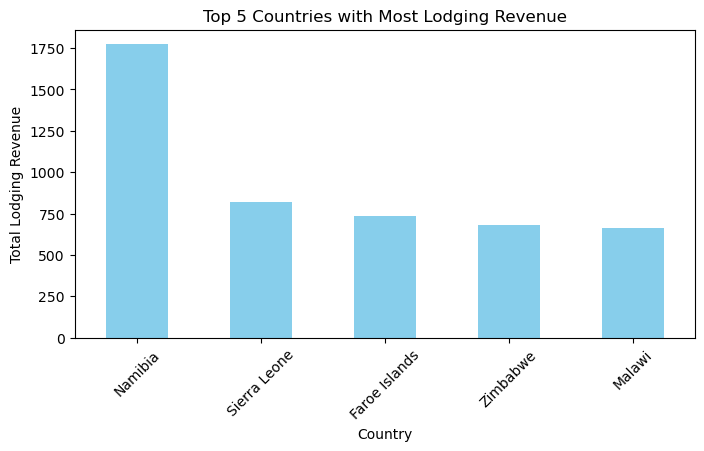

In [52]:
# Calculate total lodging revenue per nationality
total_revenue_per_country = df_eda.groupby('country_name')['LodgingRevenue'].mean()

# Sort by revenue and select top 5 countries
top_5_countries = total_revenue_per_country.nlargest(5)

# Plotting
plt.figure(figsize=(8, 4))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Lodging Revenue')
plt.xlabel('Country')
plt.ylabel('Total Lodging Revenue')
plt.xticks(rotation=45)
plt.show()


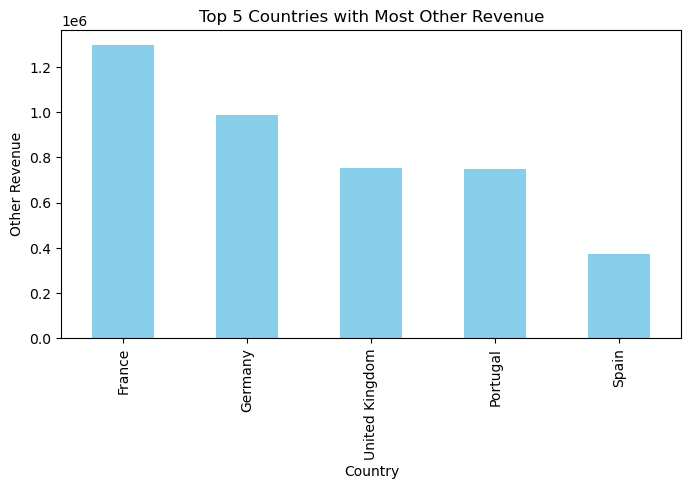

In [53]:
other_revenue_per_country = df_eda.groupby('country_name')["OtherRevenue"].sum()
top_5_countries_other = other_revenue_per_country.nlargest(5).sort_values(ascending=False)

plt.figure(figsize=(8,4))
top_5_countries_other.plot(kind='bar', xlabel='Country', ylabel='Other Revenue', title='Top 5 Countries with Most Other Revenue', color='Skyblue')
plt.show()

There are many cases where most of important data is Zero, only client information is provided. What is this? Errors or data about the other members? Are those important from our analysis?

In [ ]:
# df_eda[(df_eda['LodgingRevenue'] == 0) & (df_eda['OtherRevenue'] == 0)] 33k obs with zeros everywhere
df_eda[(df_eda['LodgingRevenue'] == 0) & (df_eda['OtherRevenue'] != 0)]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
59,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.0,0,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
267,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
290,NaN,1381,0xF58BB978660EBDA908A5AC6DD9F43509627DCC107110...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,5.5,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
307,59.0,1381,0xC7CEF7F0CFA36F08235161BC4C44B10A2F295E8E4FEC...,0xCEF6D181A6A57F9F454F3E55EA013F9B5B9822FD70F4...,23,0.0,15.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Italy
323,NaN,1381,0xD0FA44B861374D601D25944C91AF07F6341A6E359B12...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102750,46.0,108,0x286863E22D961B7024574F2BBD9DC925CBBA2E25E697...,0xBDB292A0A25FFACB42A1B09B9AE05D8FE521D52E860C...,236,0.0,87.4,0,0,1,...,0,0,0,0,0,0,0,0,0,United States
102898,71.0,107,0x6179F864270084817DC04BE033583189FE982DE102CD...,0xAA59C89DA67951F2966EB54A2F55FCC19A825F19BF4E...,236,0.0,28.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Brazil
102912,35.0,107,0xF23D30CAEFA9DD2AF7312A187FA3D4D9A71D70649DAA...,0xDB496AAFC493223B0E7D419F892B190F1F492574F66F...,237,0.0,28.0,0,0,1,...,0,0,0,0,1,0,0,0,0,United States


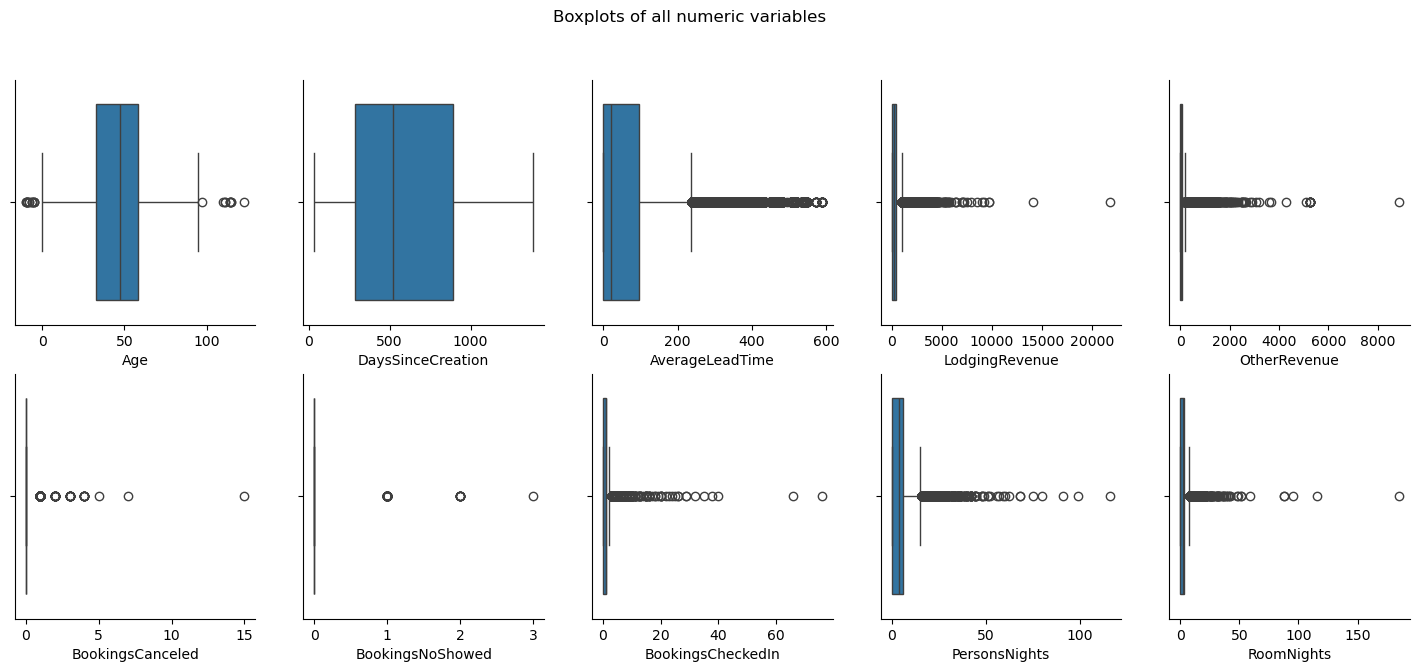

In [98]:
# BOXPLOT (Metric Features)

metric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                   'PersonsNights', 'RoomNights']

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,7))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplots of all numeric variables");

In [79]:
lodging_revenue_by_channel = df_eda.groupby('DistributionChannel')[['LodgingRevenue']].sum().round(1).sort_values(by='LodgingRevenue', ascending=False)
lodging_revenue_by_channel
#lodging_revenue_by_channel.plot(kind='barh', figsize=(7,4))
#plt.show()

,LodgingRevenue
DistributionChannel,
Travel Agent/Operator,25505586.2
Direct,4981176.1
Corporate,1027637.1
GDS Systems,201156.1


In [80]:
# Select columns starting with 'SR'
sr_columns = [col for col in df.columns if col.startswith('SR')]

# Melt the DataFrame to have all 'SR' columns in a single column
df_melted = df.melt(value_vars=sr_columns, var_name='SR', value_name='value')

# Group by the 'value' column (0 or 1) and count the occurrences
grouped_counts = df_melted.groupby(['SR', 'value']).size().unstack(fill_value=0)

grouped_counts


value,0,1
SR,,
SRAccessibleRoom,111708,25
SRAwayFromElevator,111331,402
SRBathtub,111383,350
SRCrib,109925,1808
SRHighFloor,106983,4750
SRKingSizeBed,71144,40589
SRLowFloor,111587,146
SRMediumFloor,111647,86
SRNearElevator,111696,37


In [88]:
df_eda.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,'RoomNights']].mean().round()

,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights
DistributionChannel,,,,,,
Corporate,47.0,328.0,67.0,30.0,716.0,3.0
Direct,43.0,295.0,65.0,40.0,542.0,2.0
GDS Systems,44.0,289.0,36.0,21.0,536.0,2.0
Travel Agent/Operator,46.0,280.0,65.0,66.0,601.0,2.0


In [86]:
df_eda.head(2)

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
2,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 4 Data Cleaning
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 5 Features
    

</div>

**For Kmeans we should use features that can be measure such as**:
- Age
- DaysSinceCreation
- AverageLeadTime
- LodgingRevenue
- OtherRevenue
- PersonsNights
- RoomNights
- Bookings

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 6 Models
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 7 Clusters Analysis and Recommendations
    

</div>